## Step 1: Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

## Step 2: Load Data and Model

In [2]:
from joblib import load
model = load('../trained_model.pkl')
print("model is successfully loaded")

model is successfully loaded


In [3]:
#load test data 
X_train = pd.read_csv(r'C:\Users\user\Omdena\machine-learning-linear-regression-carolynewambura06\X_train.csv')
X_test = pd.read_csv(r'C:\Users\user\Omdena\machine-learning-linear-regression-carolynewambura06\X_test.csv')
y_train = pd.read_csv(r'C:\Users\user\Omdena\machine-learning-linear-regression-carolynewambura06\y_train.csv')
y_test = pd.read_csv(r'C:\Users\user\Omdena\machine-learning-linear-regression-carolynewambura06\y_test.csv')

y_pred = model.predict(X_test)

In [4]:
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_test shape: (152, 10)
y_test shape: (152, 1)


## Step 3 : Calculate Evaluation Metrics

In [5]:
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"R²: {r2:.2f}")

calculate_metrics(y_test, y_pred)

MSE: 24.48
RMSE: 4.95
MAE: 3.46
R²: 0.67


## Step 4: Plot Actual vs. Predicted Values

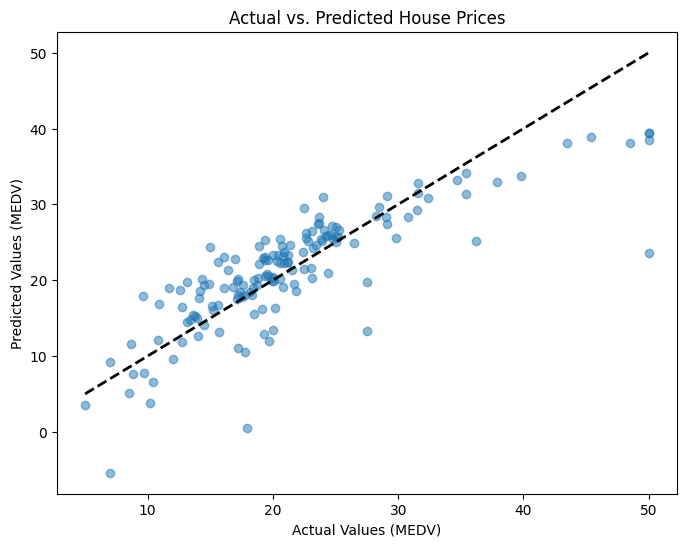

In [6]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values (MEDV)')
plt.ylabel('Predicted Values (MEDV)')
plt.title('Actual vs. Predicted House Prices')
plt.show()

## Step 5: Analyze Residuals

In [7]:
# Ensure y_test is a 1D array/Series
y_test_values = y_test.values.flatten() if hasattr(y_test, 'values') else y_test.flatten()
y_pred_values = y_pred.flatten()

print(f"y_test shape: {y_test_values.shape}")
print(f"y_pred shape: {y_pred_values.shape}")


y_test shape: (152,)
y_pred shape: (152,)


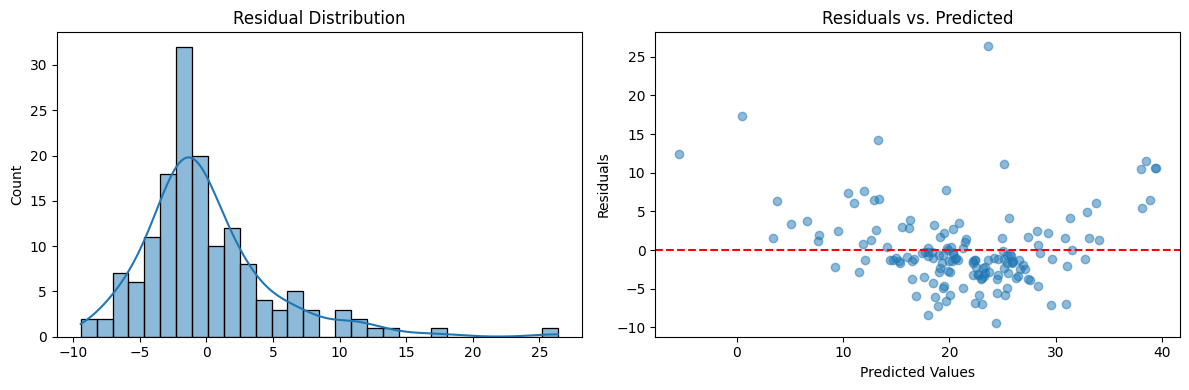

In [8]:
#Calculate residuals
residuals = y_test_values - y_pred_values

# Plot distribution
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True, bins=30)
plt.title('Residual Distribution')

# Plot residuals vs predicted
plt.subplot(1, 2, 2)
plt.scatter(y_pred_values, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Predicted')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

## Step 8: Compare Different Feature Sets

In [9]:
def compare_models(feature_sets, X_train, y_train, X_test, y_test):
    # Ensure y_test is flattened
    y_test_values = y_test.values.flatten() if hasattr(y_test, 'values') else y_test.flatten()
    y_train_values = y_train.values.flatten() if hasattr(y_train, 'values') else y_train.flatten()
    
    results = {}
    
    for name, features in feature_sets.items():
        try:
            # Train model
            model = LinearRegression().fit(X_train[features], y_train_values)
            
            # Predict and evaluate
            y_pred = model.predict(X_test[features])
            results[name] = {
                'Features': ', '.join(features) if len(features) < 10 else f'{len(features)} features',
                'RMSE': np.sqrt(mean_squared_error(y_test_values, y_pred)),
                'MAE': mean_absolute_error(y_test_values, y_pred),
                'R²': r2_score(y_test_values, y_pred)
            }
            
        except Exception as e:
            print(f"Error evaluating {name}: {str(e)}")
            results[name] = {
                'Features': 'ERROR',
                'RMSE': np.nan,
                'MAE': np.nan,
                'R²': np.nan
            }
    
    return pd.DataFrame(results).T

# Example usage:
feature_sets = {
    'Top 3': ['lstat', 'rm', 'ptratio'],
    'Top 5': ['lstat', 'rm', 'ptratio', 'indus', 'tax'],
    'All Features': X_train.columns.tolist()  # Ensure this is a list
}

# Call the function with all required parameters
model_comparison = compare_models(
    feature_sets=feature_sets,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test
)

# Display nicely formatted results
print("Model Comparison Results:")
display(model_comparison)

Model Comparison Results:


,Features,RMSE,MAE,R²
Top 3,"lstat, rm, ptratio",5.100217,3.591179,0.650904
Top 5,"lstat, rm, ptratio, indus, tax",5.107448,3.562647,0.649914
All Features,10 features,4.947597,3.455261,0.671484
